In [1]:
# načtení dat
import pandas as pd

# reading the CSV file
data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
df = pd.DataFrame(data)

# vyber kompletnich
df.dropna(axis = 0, how = 'any', inplace = True)

# ulozim si labely abych je pak mohla nalepit
ROI = df.loc[:,"ROI name"]

# odstranim ty popisky
df= df.drop(columns = ['ROI name'])

# pruzkum sloupcu - ktere jsou vadne
"""for i in range(df.shape[1]):
    try:
        df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])
 skoro vsechny - podivala jsem se v R u nekterych techu jsou tady hodnoty I.97... asi jsou to chybné values, vyhodim je, pak se zeptam Renci"""

 # pruzkum radku - ktere jsou vadne
bad_row = []
bad_row_counter = 0
for i in range(df.shape[0]):
    try:
        df.loc[i,:].astype(float)
    except ValueError as ve:
        bad_row_counter += 1
        bad_row.append(i)

"""86 radku obsahuje tady tuto chybu => vyhodim tyto radky (overime pak, jestli muzu)"""

# prilepit zpatky ROI

df['ROI'] = ROI

# odhodit radky kde je divnotyp
df = df.drop(bad_row)

# pretypovat
for i in range(3,97):
    try:
        df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])

# rozdelit na barvicky
blue = df.loc[df['ROI'] == 'blue']
green = df.loc[df['ROI'] == 'green']
dry = df.loc[df['ROI'] == 'dry']
tech = df.loc[df['ROI'] == 'tech']
soil = df.loc[df['ROI'] == 'soil']

blue= blue.drop(columns = ['ROI'])
dry= dry.drop(columns = ['ROI'])
green= green.drop(columns = ['ROI'])
tech= tech.drop(columns = ['ROI'])
soil= soil.drop(columns = ['ROI'])

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

output = df['ROI']
input = df.loc[:, ~df.columns.isin(['Tray', 'ROI'])]

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state=42)

C:\Users\h337\AppData\Local\Temp/ipykernel_7548/1943428273.py:5: DtypeWarning: Columns (6,8,10,11,12,16,17,19,20,23,24,25,27,29,33,34,36,38,39,40,41,42,43,44,48,49,50,53,54,55,56,58,59,60,61,63,64,65,68,69,73,74,75,76,79,81,82,83,84,85,86,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
C:\Users\h337\AppData\Local\Temp/ipykernel_7548/1943428273.py:47: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state=42)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc


0.9723213577603299

[Text(0.5, 0.875, 'X[51] <= 0.549\nsamples = 100.0%\nvalue = [0.212, 0.069, 0.129, 0.097, 0.493]\nclass = TECH'),
 Text(0.25, 0.625, 'X[11] <= 0.497\nsamples = 43.9%\nvalue = [0.482, 0.01, 0.279, 0.212, 0.017]\nclass = BLUE'),
 Text(0.125, 0.375, 'X[74] <= 0.868\nsamples = 22.0%\nvalue = [0.009, 0.019, 0.551, 0.417, 0.004]\nclass = GREEN'),
 Text(0.0625, 0.125, 'samples = 9.5%\nvalue = [0.011, 0.015, 0.012, 0.953, 0.009]\nclass = SOIL'),
 Text(0.1875, 0.125, 'samples = 12.5%\nvalue = [0.008, 0.022, 0.963, 0.007, 0.0]\nclass = GREEN'),
 Text(0.375, 0.375, 'X[0] <= 163.5\nsamples = 21.9%\nvalue = [0.959, 0.001, 0.004, 0.006, 0.03]\nclass = BLUE'),
 Text(0.3125, 0.125, 'samples = 0.5%\nvalue = [0.0, 0.0, 0.0, 0.0, 1.0]\nclass = TECH'),
 Text(0.4375, 0.125, 'samples = 21.4%\nvalue = [0.981, 0.001, 0.004, 0.006, 0.008]\nclass = BLUE'),
 Text(0.75, 0.625, 'X[10] <= 0.569\nsamples = 56.1%\nvalue = [0.0, 0.115, 0.012, 0.007, 0.865]\nclass = TECH'),
 Text(0.625, 0.375, 'X[0] <= 311.5\nsamples =

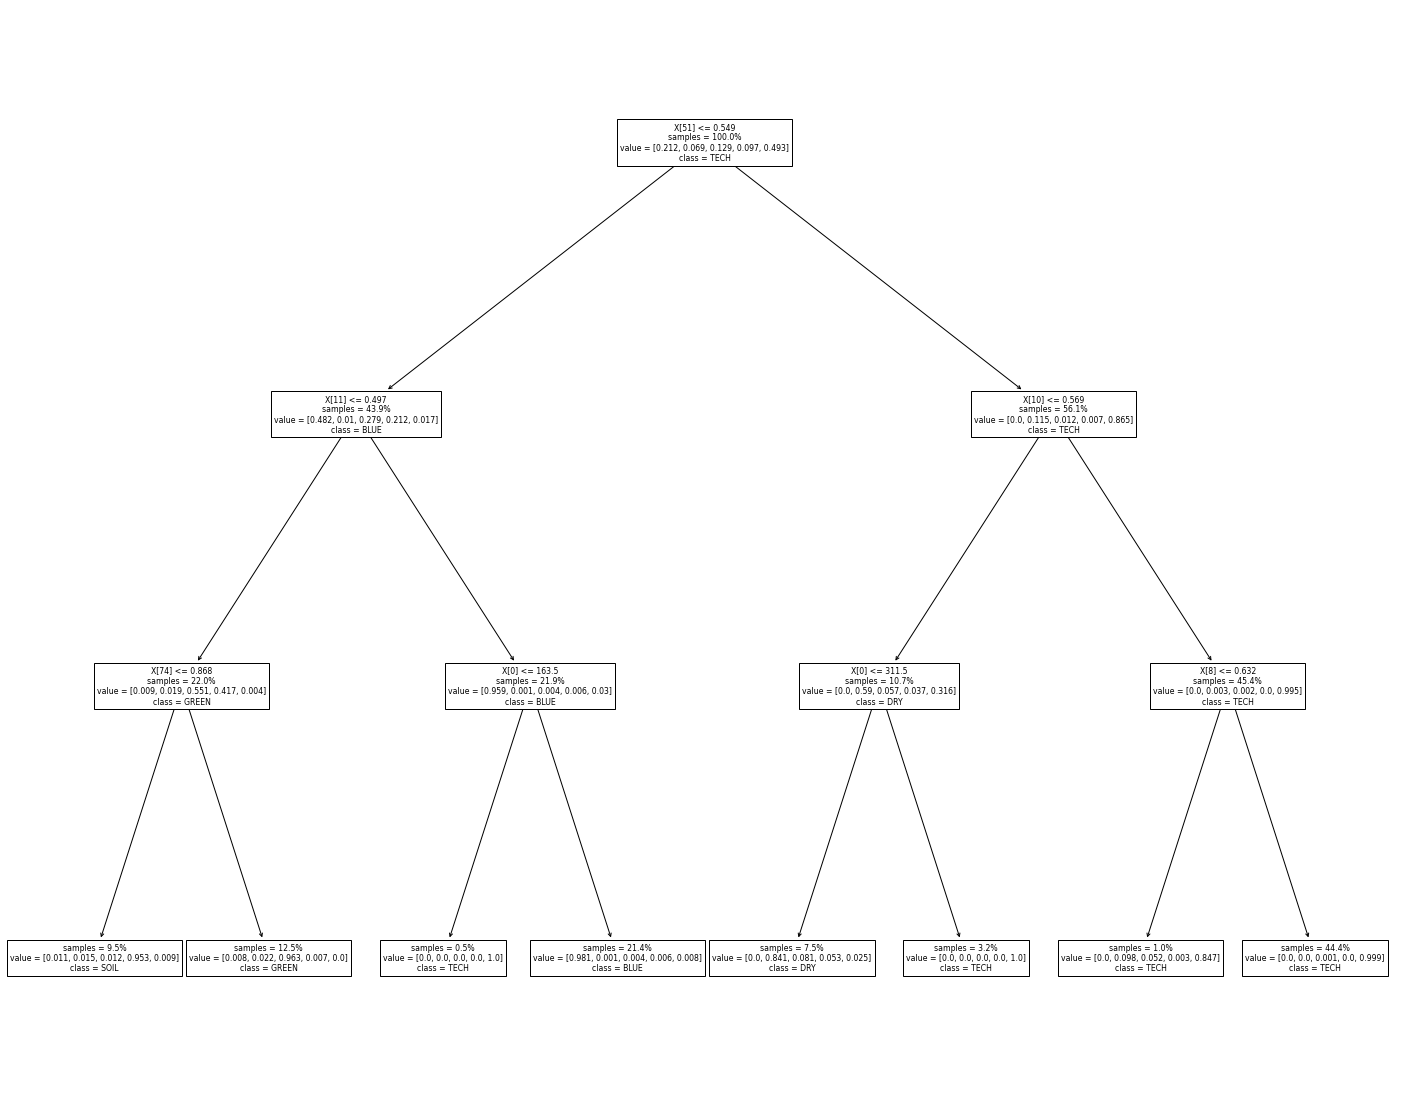

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            class_names= ['BLUE','DRY', 'GREEN', 'SOIL', 'TECH'],
            impurity=False,
            proportion=True,
            filled=False)
#fig.savefig('test.png')

In [21]:
from sklearn import tree
print(tree.export_text(dtree))

|--- feature_51 <= 0.55
|   |--- feature_11 <= 0.50
|   |   |--- feature_74 <= 0.87
|   |   |   |--- class: soil
|   |   |--- feature_74 >  0.87
|   |   |   |--- class: green
|   |--- feature_11 >  0.50
|   |   |--- feature_0 <= 163.50
|   |   |   |--- class: tech
|   |   |--- feature_0 >  163.50
|   |   |   |--- class: blue
|--- feature_51 >  0.55
|   |--- feature_10 <= 0.57
|   |   |--- feature_0 <= 311.50
|   |   |   |--- class: dry
|   |   |--- feature_0 >  311.50
|   |   |   |--- class: tech
|   |--- feature_10 >  0.57
|   |   |--- feature_8 <= 0.63
|   |   |   |--- class: tech
|   |   |--- feature_8 >  0.63
|   |   |   |--- class: tech



ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH